# 판매 데이터 데이터 처리

### 데이터 설명:
매장에서 판매되는 상품의 판매 데이터를 포함하고 있습니다. 데이터는 상품 카테고리, 날짜, 매출, 판매 수량 등을 포함하며, 이를 통해 각 카테고리별 매출 비율 및 주중/주말별 판매 패턴을 분석해야 합니다.

### 요구사항:
1. 상품 카테고리별로 총 매출과 평균 매출을 계산하세요.
2. 날짜를 기준으로 주중/주말을 구분하고, 주중과 주말의 평균 매출 차이를 계산하세요.
3. 매출 데이터를 이용해 매출 비율(전체 매출에서 해당 상품의 비율)을 계산하여 새로운 컬럼에 추가하세요.
4. pivot_table을 사용하여 각 상품 카테고리와 주중/주말별 매출 합계를 구하세요.
5. 최종 분석 결과를 시각화하여 간단한 인사이트를 도출하세요.

In [1]:
# 데이터 생성 코드
import pandas as pd
import numpy as np
np.random.seed(42)
data = {
    'Product_Category': np.random.choice(['A', 'B', 'C', 'D'], size=500),
    'Date': pd.date_range(start='2023-01-01', periods=500),
    'Sales': np.random.randint(1000, 5000, size=500),
    'Quantity_Sold': np.random.randint(1, 100, size=500)
}
df = pd.DataFrame(data)
df.head()

,Product_Category,Date,Sales,Quantity_Sold
0,C,2023-01-01,1190,6
1,D,2023-01-02,3300,82
2,A,2023-01-03,1980,69
3,C,2023-01-04,3975,47
4,C,2023-01-05,3006,25


### 풀이:
아래의 코드는 위의 요구사항을 해결하기 위해 Pandas를 사용하여 데이터를 분석하고 처리하는 과정을 포함합니다.

In [2]:
# 1. 상품 카테고리별로 총 매출과 평균 매출을 계산하세요.
category_sales = df.groupby('Product_Category')['Sales'].agg(['sum', 'mean']).reset_index()
category_sales

,Product_Category,sum,mean
0,A,363793,2981.909836
1,B,323251,2993.064815
2,C,380611,3119.762295
3,D,446476,3016.729730


In [9]:
# 2. 날짜를 기준으로 주중/주말을 구분하고, 주중과 주말의 평균 매출 차이를 계산하세요.
df['Date'] = pd.to_datetime(df['Date'])

df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = np.where(df['Weekday'] >= 5, 'Weekend', 'Weekday')

weekend_sales = df.groupby('Is_Weekend')['Sales'].mean()

difference = weekend_sales['Weekend'] - weekend_sales['Weekday']
difference

-144.67362049714984

: 

In [ ]:
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
weekend_sales = df.groupby('Is_Weekend')['Sales'].mean()
weekend_sales

In [4]:
# 3. 매출 데이터를 이용해 매출 비율(전체 매출에서 해당 상품의 비율)을 계산하여 새로운 컬럼에 추가하세요.
total_sales = df['Sales'].sum()
df['Sales_Ratio'] = df['Sales'] / total_sales
df[['Product_Category', 'Sales', 'Sales_Ratio']].head()

,Product_Category,Sales,Sales_Ratio
0,C,1190,0.000786
1,D,3300,0.002179
2,A,1980,0.001308
3,C,3975,0.002625
4,C,3006,0.001985


In [5]:
# 4. pivot_table을 사용하여 각 상품 카테고리와 주중/주말별 매출 합계를 구하세요.
pivot_table_sales = pd.pivot_table(df, values='Sales', index='Product_Category', columns='Is_Weekend', aggfunc='sum').reset_index()
pivot_table_sales.columns.name = None  # MultiIndex 제거
pivot_table_sales

Is_Weekend,Product_Category,Weekday,Weekend
0,A,261619,102174
1,B,219615,103636
2,C,307936,72675
3,D,306691,139785


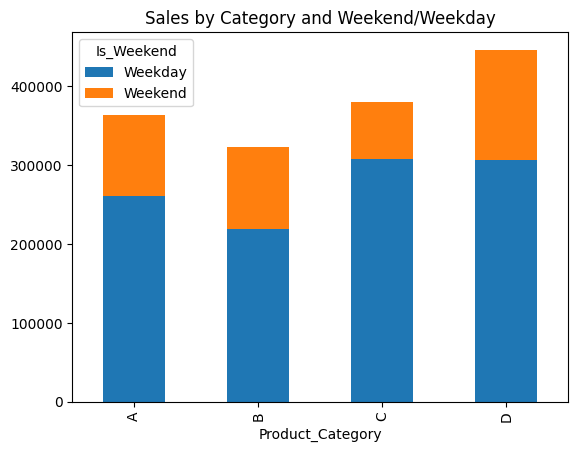

In [6]:
# 5. 최종 분석 결과를 시각화하여 간단한 인사이트를 도출하세요.
import matplotlib.pyplot as plt
pivot_table_sales.plot(kind='bar', x='Product_Category', stacked=True)
plt.title('Sales by Category and Weekend/Weekday')
plt.show()